In [51]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import random
import copy
from pandas import read_csv
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [3]:
train_test_split?

In [4]:
train_images, test_images, train_labels, test_labels = \
            train_test_split(images, labels, random_state=42) #train_size=10000, stratify=labels

In [5]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import seaborn as sns
import matplotlib.pyplot as plt

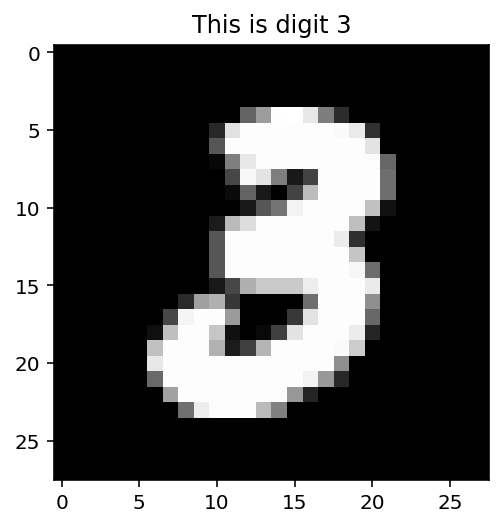

In [6]:
SAMPLE_NUM = 777

plt.imshow(train_images[SAMPLE_NUM].reshape(28, 28), cmap='gray')
plt.title(f'This is digit {train_labels[SAMPLE_NUM]}')
plt.show()

To plot everything in grayscale:

In [7]:
# plt.gray()
# or
plt.rcParams['image.cmap'] = 'gray'

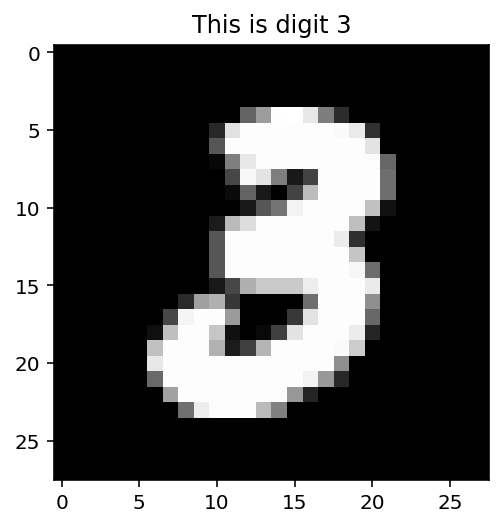

In [8]:
plt.imshow(train_images[SAMPLE_NUM].reshape(28, 28))
plt.title(f'This is digit {train_labels[SAMPLE_NUM]}')
plt.show()

In [9]:
import numpy as np

def select_with_label(images, labels, desired_labels):
    mask = np.isin(labels, desired_labels)
    return images[mask], labels[mask]

images_of_two, labels_of_two = \
            select_with_label(train_images, train_labels, desired_labels=['2'])
images_of_odd, labels_of_odd = \
            select_with_label(train_images, train_labels, desired_labels=['1', '3', '5', '7', '9'])

In [10]:
np.unique(labels_of_two)

array(['2'], dtype=object)

In [11]:
images_of_3_7, labels_of_3_7 = \
            select_with_label(train_images, train_labels, desired_labels=['3', '7'])

In [12]:
print(images_of_3_7.shape)# total 10750 samples
print(labels_of_3_7.shape)

(10750, 784)
(10750,)


In [13]:
train_images, test_images, train_labels, test_labels = train_test_split(images_of_3_7, labels_of_3_7, train_size = 1600, test_size = 400, random_state=42)

In [35]:
class Kmeans:
    def __init__(self, n_clusters, init="random", max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.pred = []
        self.Output = {}
        
        
    def fit(self, X, y=None):
        self.Centroids = np.array([]).reshape(X.shape[1], 0)
        # randomly Initialize the centroids
        for i in range(self.n_clusters):
            rand = random.randint(0, X.shape[0] - 1)
            self.Centroids = np.c_[self.Centroids, X[rand]]

        
    def predict(self, X):
        for n in range(self.max_iter):
            EuclidianDistance = np.array([]).reshape(X.shape[0], 0)
            for k in range(self.n_clusters):
                tempDist = np.sum(pow((X - self.Centroids[:, k]), 2), axis=1)
                EuclidianDistance = np.c_[EuclidianDistance, tempDist]
            C = np.argmin(EuclidianDistance, axis=1) + 1
            Y = {}
            for k in range(self.n_clusters):
                Y[k + 1] = np.array([]).reshape(784, 0)
            for i in range(X.shape[0]):
                Y[C[i]] = np.c_[Y[C[i]], X[i]]
            for k in range(self.n_clusters):
                Y[k + 1] = Y[k + 1].T
                self.Centroids[:, k] = np.mean(Y[k + 1], axis=0)
            self.Output = Y
            self.predictions = copy.copy(C)

        return self.Output, self.Centroids.T, self.predictions


In [36]:
def getJ(J):
    j = 0
    for k in range(K):
        j += np.sum((Output[k + 1] - Centroids[k, :]) ** 2)
    J = np.append(J, j)
    return J

In [41]:
#train_images, test_images, train_labels, test_labels
J = np.array([])
# to find optimum number of clusters
for K in range(1, 11):
    kmeans = Kmeans(K)
    kmeans.fit(train_images)
    Output, Centroids, C = kmeans.predict(test_images)
    J = getJ(J)
    """
    if K == 2:  # Question 4 la matrice de confusion
        # Matrice de confusion
        C[C == 1] = '3'
        C[C == 2] = '7'
        C = C.astype(str)
        cf_matrix = confusion_matrix(C, tr_labs)
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')
        ax.set_title('Confusion Matrix (3-7) \n\n')
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ')
        # Display the visualization of the Confusion Matrix.
        plt.show()"""

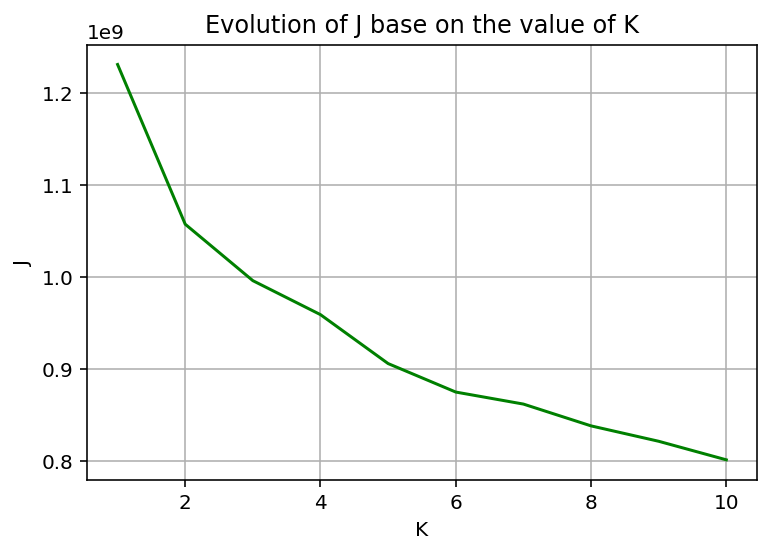

In [43]:
K_array = np.arange(1, 11, 1)
plt.plot(K_array, J, color='green')
plt.xlabel('K')
plt.ylabel('J')
plt.title('Evolution of J base on the value of K')
plt.grid()
plt.show()

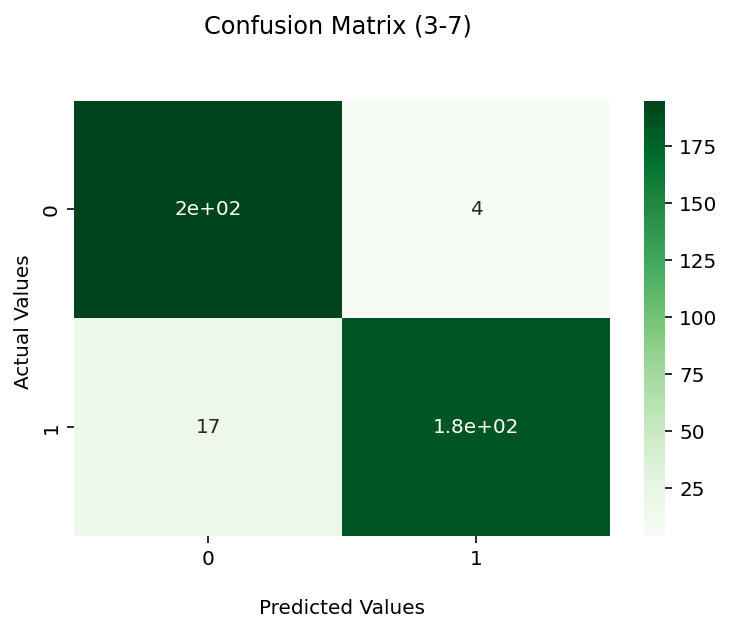

In [54]:
#train_images, test_images, train_labels, test_labels
J = np.array([])
# to find optimum number of clusters
for K in range(1, 3):
    kmeans = Kmeans(K)
    kmeans.fit(train_images)
    Output, Centroids, C = kmeans.predict(test_images)
    J = getJ(J)

    if K == 2:  # Question 4 la matrice de confusion
        # Matrice de confusion
        C[C == 1] = '3'
        C[C == 2] = '7'
        C = C.astype(str)
        cf_matrix = confusion_matrix(C, test_labels)
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')
        ax.set_title('Confusion Matrix (3-7) \n\n')
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ')
        # Display the visualization of the Confusion Matrix.
        plt.show()